### Base model

Our base model is a plain ResNet50 model which is initialized with random weights and therefore has no prior knowledge of any images.

In [39]:
from keras import preprocessing
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers

In [2]:
random_seed = 42
np.random.seed(random_seed)

In [58]:
train_data_dir = './data_split/train'
test_data_dir = './data_split/test'

img_size = (224, 224)
batch_size = 32

train_ds = preprocessing.image_dataset_from_directory(
    train_data_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True, # false,
    crop_to_aspect_ratio=True
)

val_ds = preprocessing.image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    crop_to_aspect_ratio=True
)

class_names = train_ds.class_names

#train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
#val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

Found 1545 files belonging to 3 classes.
Found 517 files belonging to 3 classes.


In [4]:
# Build model from scratch (random init)
base_model = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), classes=len(class_names)) # include_top=True adds the classification layer

base_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = base_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.7538 - loss: 1.2352 - val_accuracy: 0.5358 - val_loss: 2.2100
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.8835 - loss: 0.6819 - val_accuracy: 0.8956 - val_loss: 421.5759
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.8909 - loss: 0.4270 - val_accuracy: 0.8956 - val_loss: 13.7577
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 230s 5s/step - accuracy: 0.9005 - loss: 0.4089 - val_accuracy: 0.8956 - val_loss: 10.9692
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.8968 - loss: 0.3081 - val_accuracy: 0.8723 - val_loss: 0.3449
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.9140 - loss: 0.3002 - val_accuracy: 0.8743 - val_loss: 0.3596
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.9181 - loss: 0.2678 - val_accuracy: 0.8008 - val_loss: 0.4829
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.9158 - loss: 0.2756 - val_accuracy: 0.9052

In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


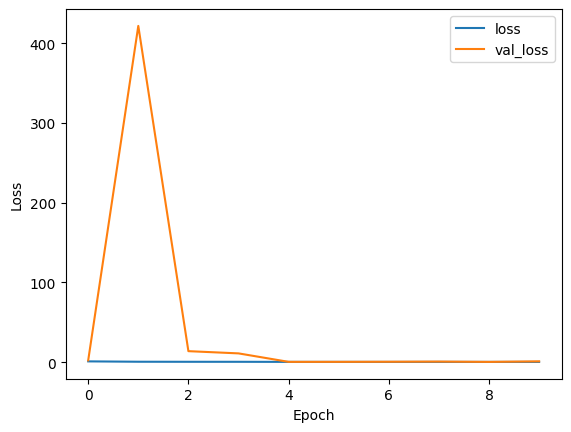

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history)

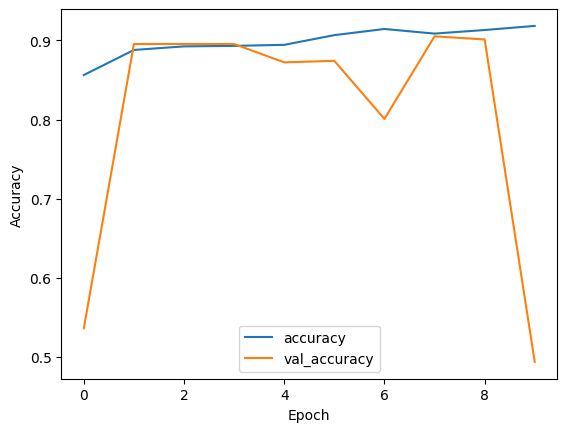

In [12]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_accuracy(history)

In [15]:
base_model.save('./models/PlainResNet50.keras')

## Pretrained model

In [23]:
pretrained = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

Use the weights that were obtained by training on the imagenet dataset. All other parameters stay the same to really compare two models.

In [24]:
pretrained_model = tf.keras.models.Sequential()
pretrained_model.add(pretrained)
pretrained_model.add(tf.keras.layers.Flatten())
pretrained_model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

pretrained_model.compile(
    optimizer=Adam(lr=0.0008),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
pretrained_history = pretrained_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.8565 - loss: 1.5788 - val_accuracy: 0.8956 - val_loss: 109231.8594
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.8823 - loss: 4.5610 - val_accuracy: 0.8956 - val_loss: 44842048.0000
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.8851 - loss: 1.2320 - val_accuracy: 0.8279 - val_loss: 7187.5557
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 233s 5s/step - accuracy: 0.8914 - loss: 1.8789 - val_accuracy: 0.8956 - val_loss: 861293.8750
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.8960 - loss: 2.3622 - val_accuracy: 0.8936 - val_loss: 3010.0000
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.8867 - loss: 1.9176 - val_accuracy: 0.8936 - val_loss: 0.5521
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 226s 5s/step - accuracy: 0.8878 - loss: 3.7676 - val_accuracy: 0.8781 - val_loss: 1858.6057
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.8974 - loss: 0.3431 

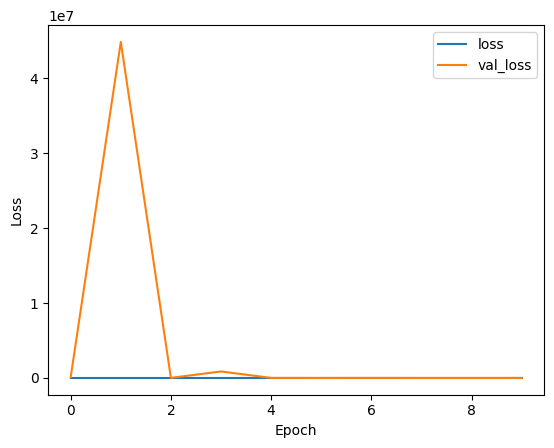

In [26]:
plot_loss(pretrained_history)

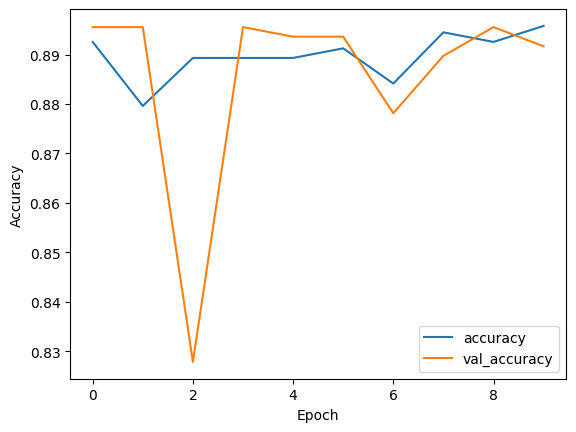

In [27]:
plot_accuracy(pretrained_history)

## Data Augmentation

In [71]:
def visualize(original, augmented):
    fig = plt.figure(figsize=(8, 4))

    def prepare(img):
        # Ensure float32 and normalize only if needed
        if img.dtype != tf.uint8:
            img = tf.clip_by_value(img, 0, 255)
            img = tf.cast(img, tf.uint8)

        img = img.numpy()

        if img.shape[-1] == 1:
            return img.squeeze(), 'gray'
        else:
            return img, None

    orig_img, cmap1 = prepare(original)
    aug_img, cmap2 = prepare(augmented)

    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(orig_img, cmap=cmap1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(aug_img, cmap=cmap2)
    plt.axis('off')

    plt.show()

In [72]:
# random zoom tf.image.central_crop
def zoom_img(image):
    rand = random.uniform(0.5, 1.0)
    zoomed = tf.image.central_crop(image, central_fraction=rand)
    return tf.image.resize(zoomed, (224, 224))

In [73]:
# random crop tf.image.stateless_random_crop
def crop_img(image):
    random_seed = (random.randint(0, 10000), random.randint(0, 10000))
    cropped = tf.image.stateless_random_crop(image, (112, 112, 3), seed=random_seed)
    return tf.image.resize(cropped, (224, 224))

In [77]:
# random translation (color) tf.image.rgb_to_grayscale
def grey_img(image):
    return tf.image.rgb_to_grayscale(image)

In [78]:
# rotation
def translate_img(image):
    rot = tf.image.rot90(image)
    return tf.image.resize(rot, (224, 224))

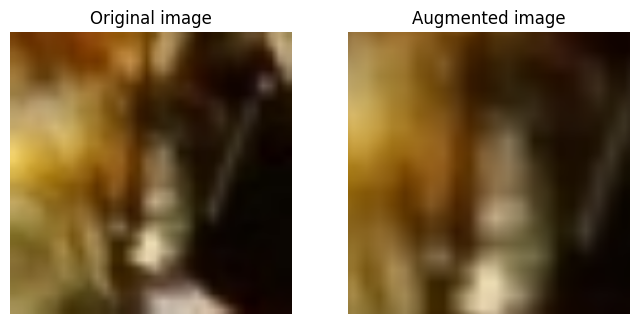

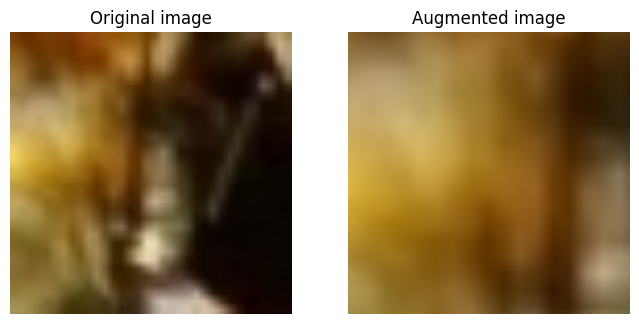

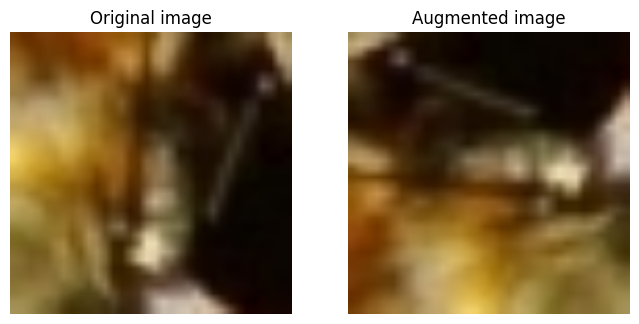

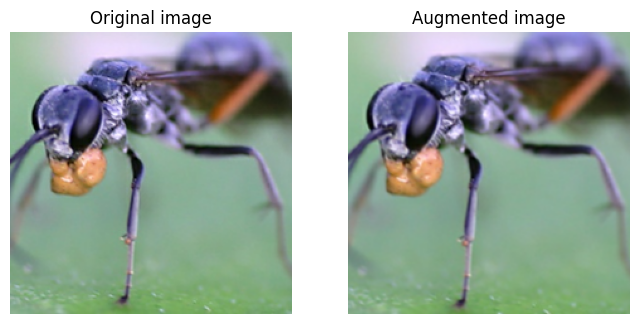

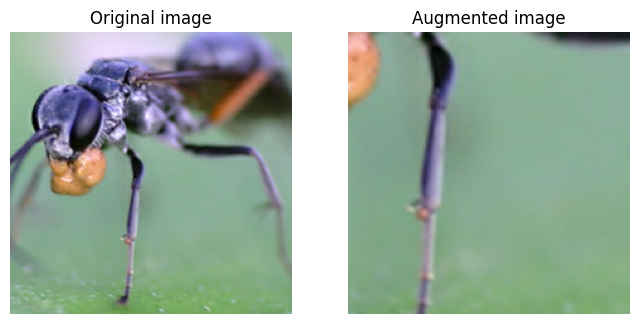

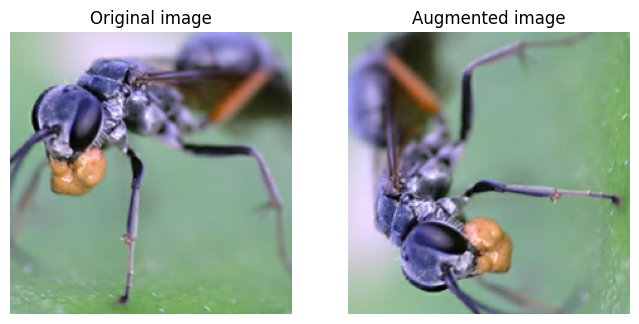

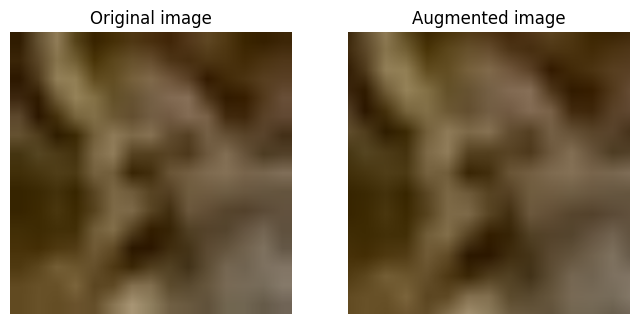

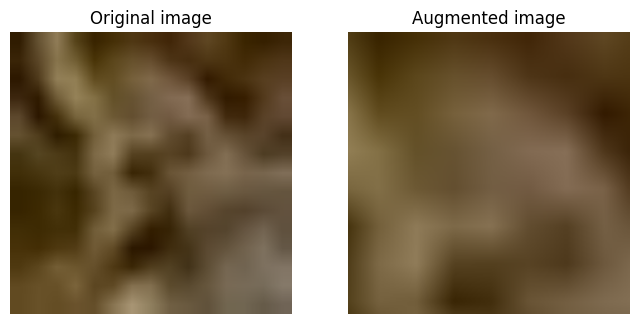

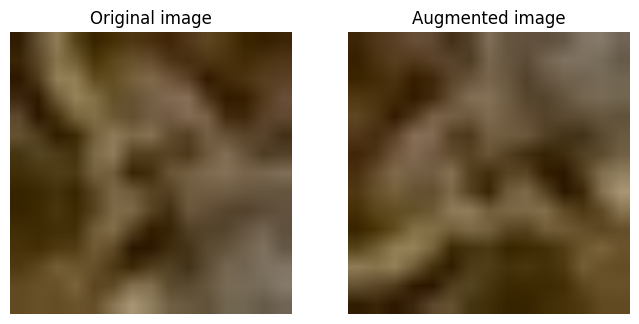

In [80]:
img_data = train_ds.unbatch()

for img, label in img_data.take(3):
    image = img
    aug_zoom = zoom_img(image)
    aug_crop = crop_img(image)
    aug_translate = translate_img(image)

    visualize(img, aug_zoom)
    visualize(img, aug_crop)
    visualize(img, aug_translate)

In [ ]:
# random left-right flip tf.image.flip_left_right

In [81]:
# augment_train_data(train_ds):
def apply_augmentation(dataset, aug_fn):
    def augment(image, label):
        image = aug_fn(image)
        return image, label
    return dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [82]:
def augment_data(ds, fractions=None):
    if fractions is None:
        fractions = {'zoom': 0.3, 'crop': 0.3, 'translate': 0.3}  # remaining 0.1 will be unaugmented

    # Unbatch dataset to access individual images
    unbatched = ds.unbatch()
    images, labels = [], []

    for img, label in unbatched:
        images.append(img)
        labels.append(label)

    total = len(images)
    idxs = list(range(total))
    random.shuffle(idxs)

    zoom_n = int(fractions['zoom'] * total)
    crop_n = int(fractions['crop'] * total)
    trans_n = int(fractions['translate'] * total)
    remain_n = total - (zoom_n + crop_n + trans_n)

    # Split indices
    zoom_idxs = idxs[:zoom_n]
    crop_idxs = idxs[zoom_n:zoom_n + crop_n]
    trans_idxs = idxs[zoom_n + crop_n:zoom_n + crop_n + trans_n]
    remain_idxs = idxs[zoom_n + crop_n + trans_n:]

    # Augment
    aug_images, aug_labels = [], []
    # add augmented data to unaugmented images
    for i in zoom_idxs:
        images.append(zoom_img(images[i]))
        labels.append(labels[i])

    for i in crop_idxs:
        images.append(crop_img(images[i]))
        labels.append(labels[i])

    for i in trans_idxs:
        images.append(translate_img(images[i]))
        labels.append(labels[i])

    for i in remain_idxs:
        images.append(images[i])
        labels.append(labels[i])

    # Create new dataset
    aug_ds = tf.data.Dataset.from_tensor_slices((images, labels))
    aug_ds = aug_ds.shuffle(1000).batch(batch_size)#.prefetch(tf.data.AUTOTUNE)

    return aug_ds

In [83]:
aug_train_ds = augment_data(train_ds)

In [85]:
aug_train_ds.shape()

AttributeError: '_BatchDataset' object has no attribute 'shape'